## Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

## Basic Information of data

In [4]:
# read the data
df = pd.read_csv("Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [7]:
df.shape

(545, 13)

In [8]:
# check the missing value
df.isna().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


## Plot the data

In [9]:
num_col = ['price','area']

cat_col = ['bedrooms','bathrooms','stories','mainroad','guestroom','basement',
           'hotwaterheating','airconditioning','parking','prefarea','furnishingstatus']

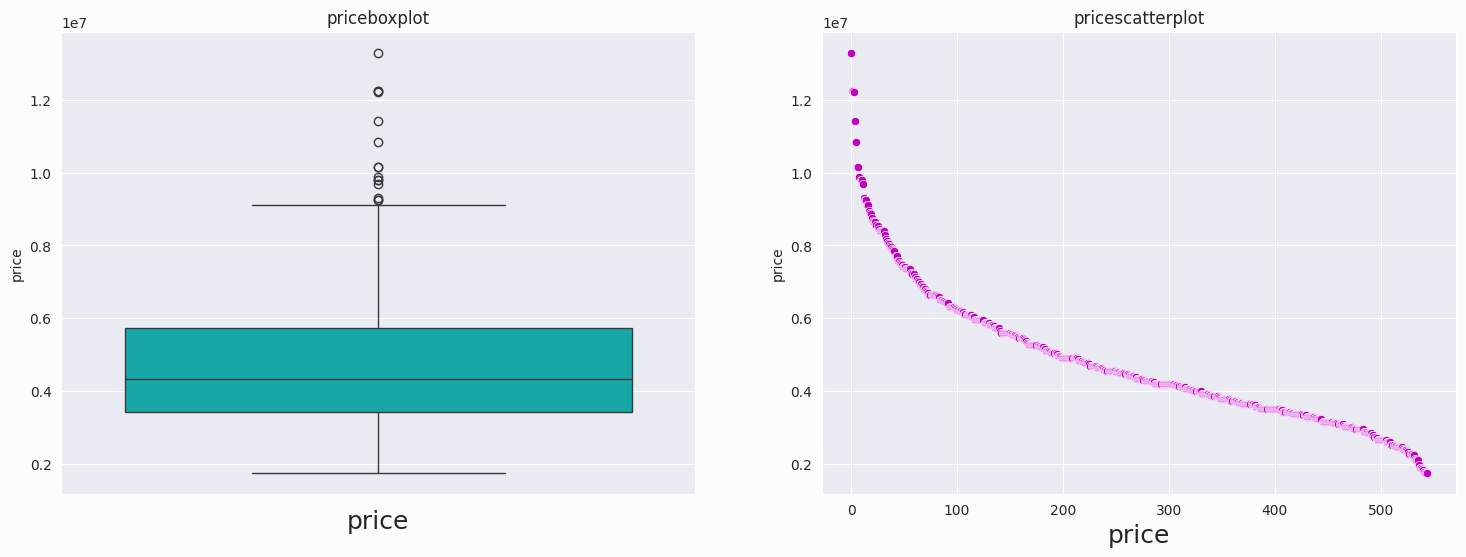

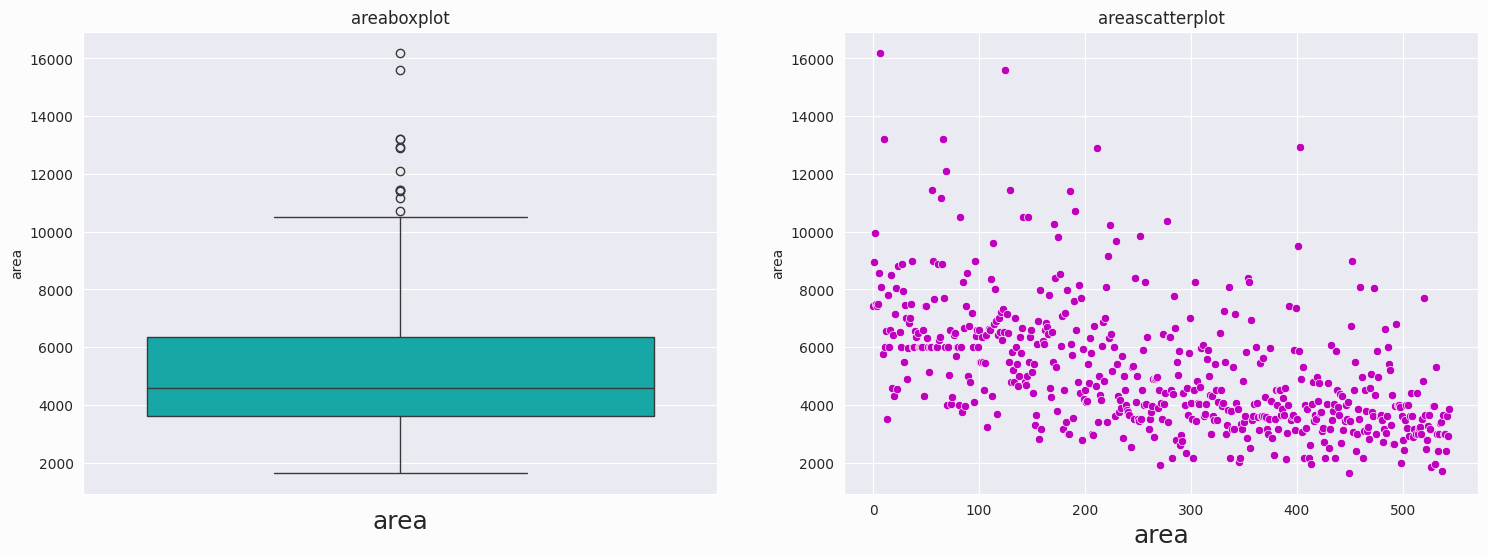

In [10]:
sns.set_style("darkgrid")
for feat in num_col:
  plt.figure(figsize=(18, 6), edgecolor='blue', facecolor='#FCFCFC')
  ax1 = plt.subplot(1, 2, 1)
  sns.boxplot(df[feat], color='c')
  plt.title(feat + 'boxplot')
  plt.xlabel(feat, fontsize=18)

  print('\n')

  ax2 = plt.subplot(1, 2, 2)
  sns.scatterplot(df[feat], color='m')
  plt.title(feat + 'scatterplot')
  plt.xlabel(feat, fontsize=18)

  plt.show()

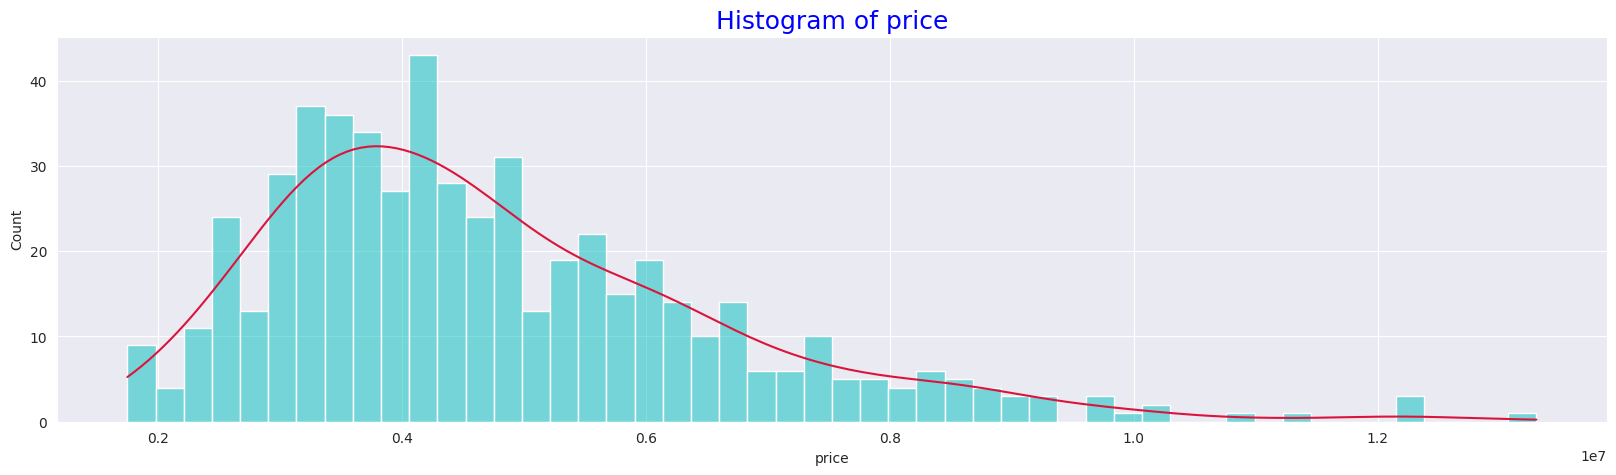

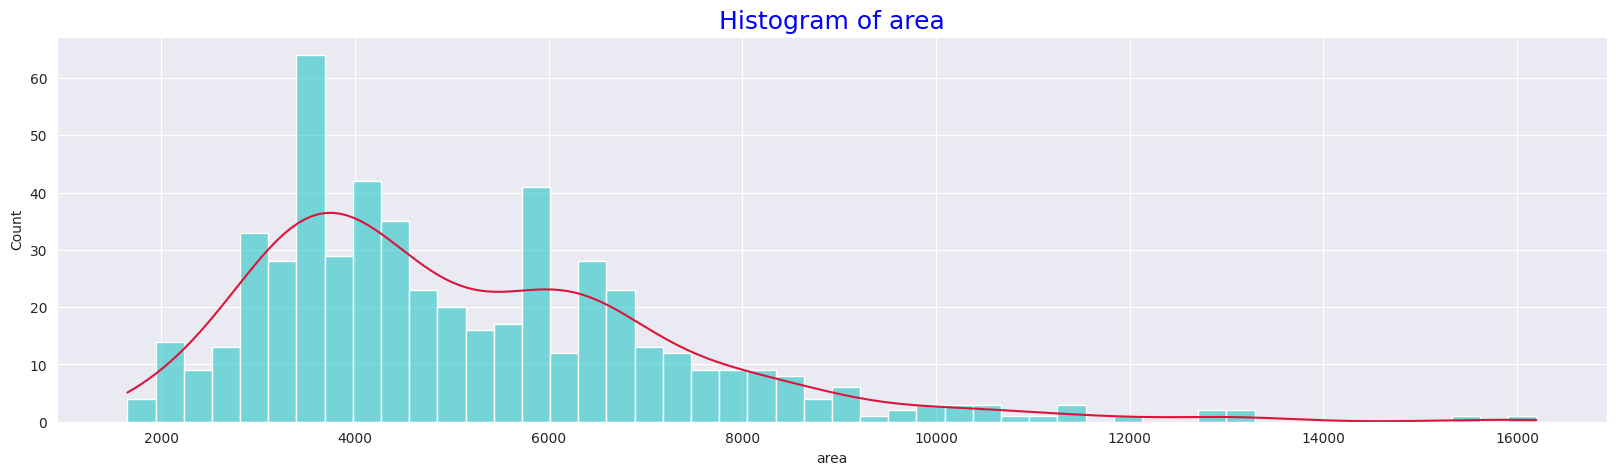

In [11]:
for i in num_col:
  plt.figure(figsize=(20, 5))
  ax = sns.histplot(data=df, x=i, bins=50, kde=True, color='c')
  ax.lines[0].set_color('crimson')
  plt.title(f'Histogram of {i}', fontdict={'size':18, 'color':'blue'})
  plt.show()

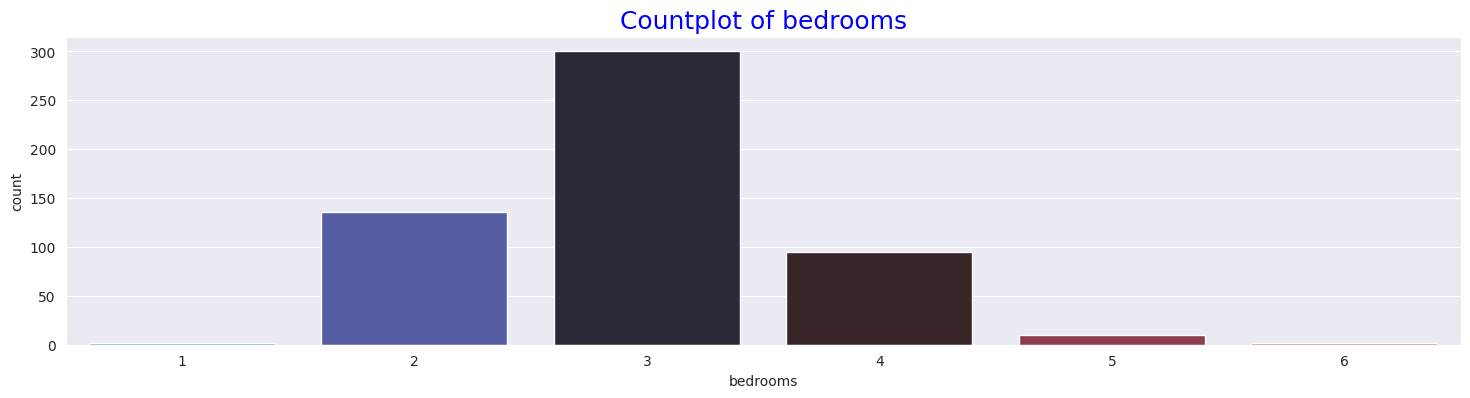

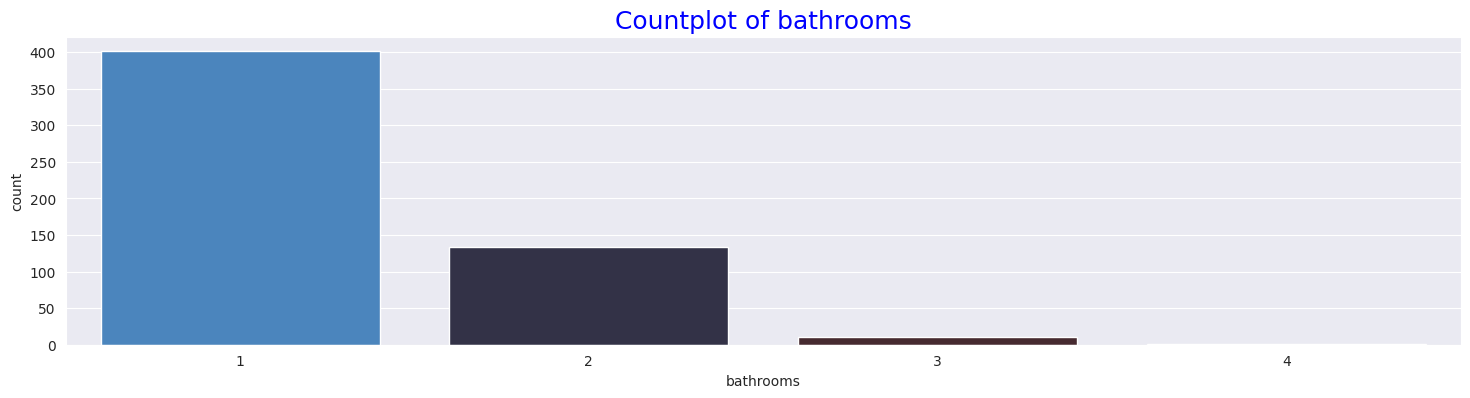

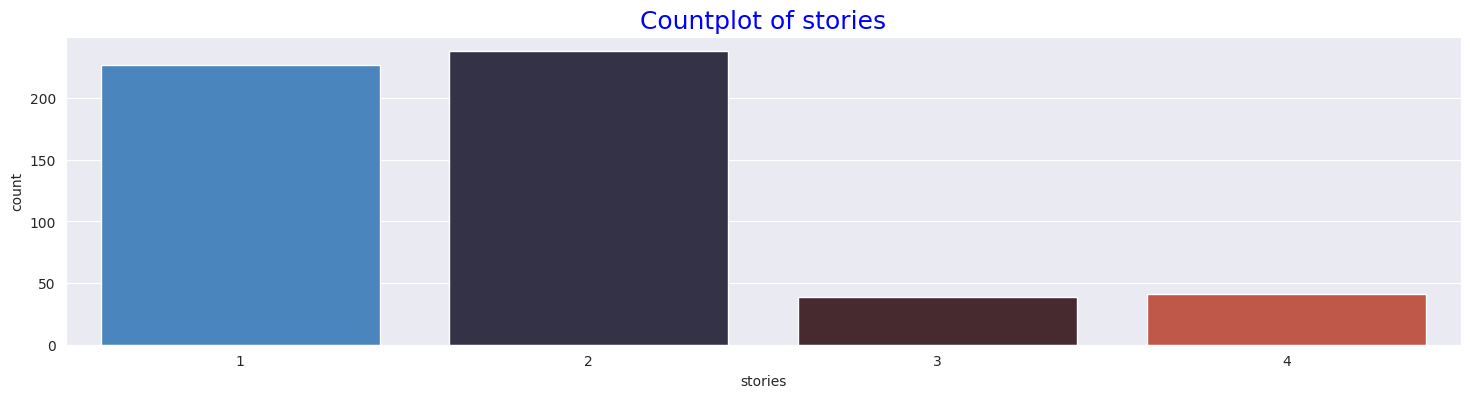

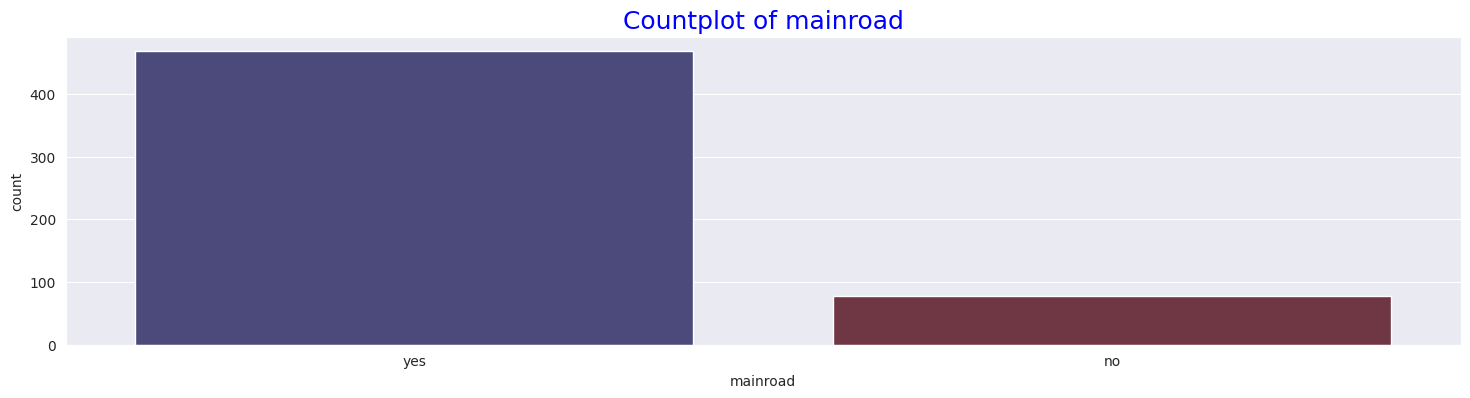

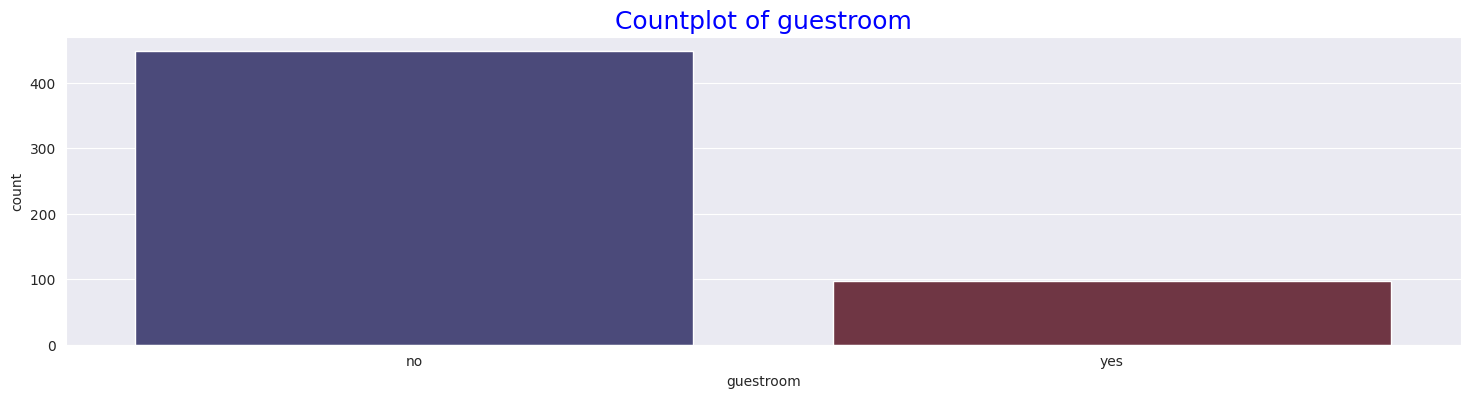

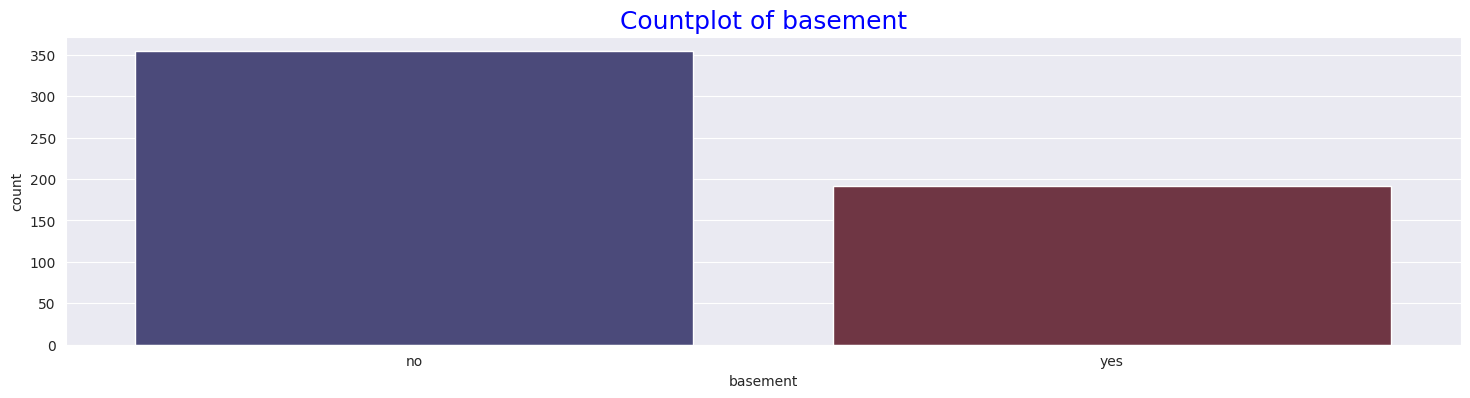

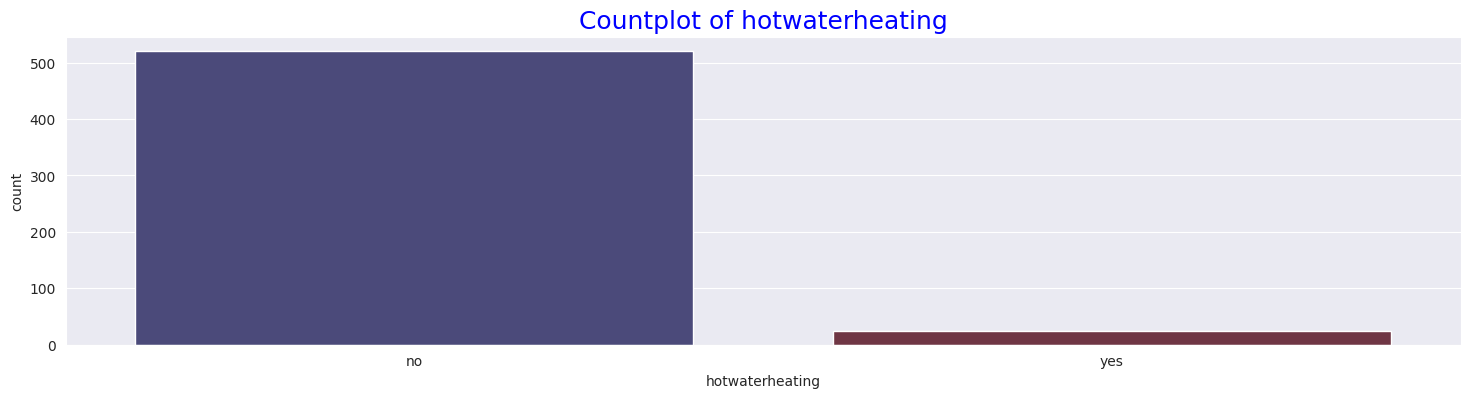

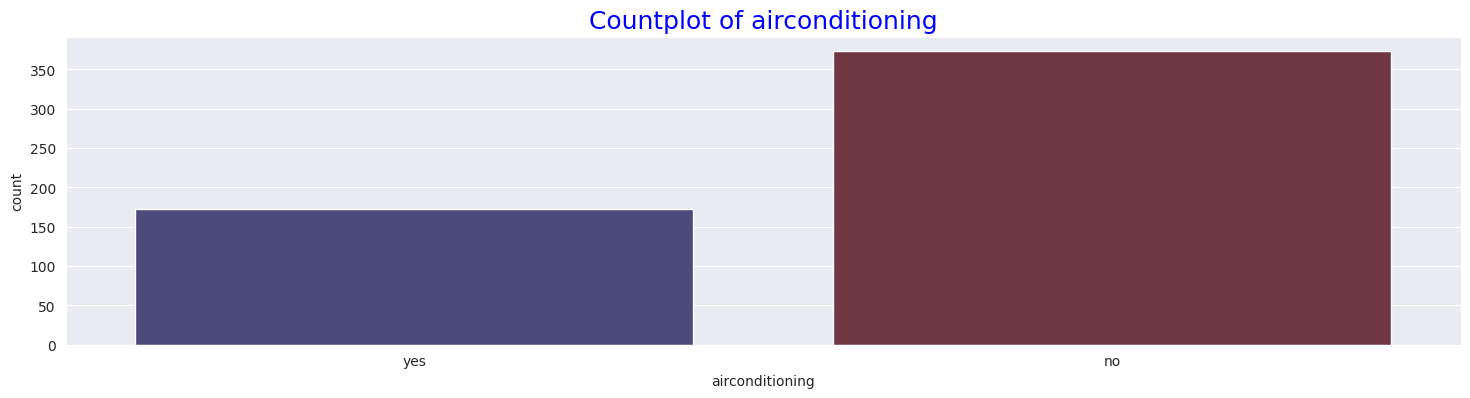

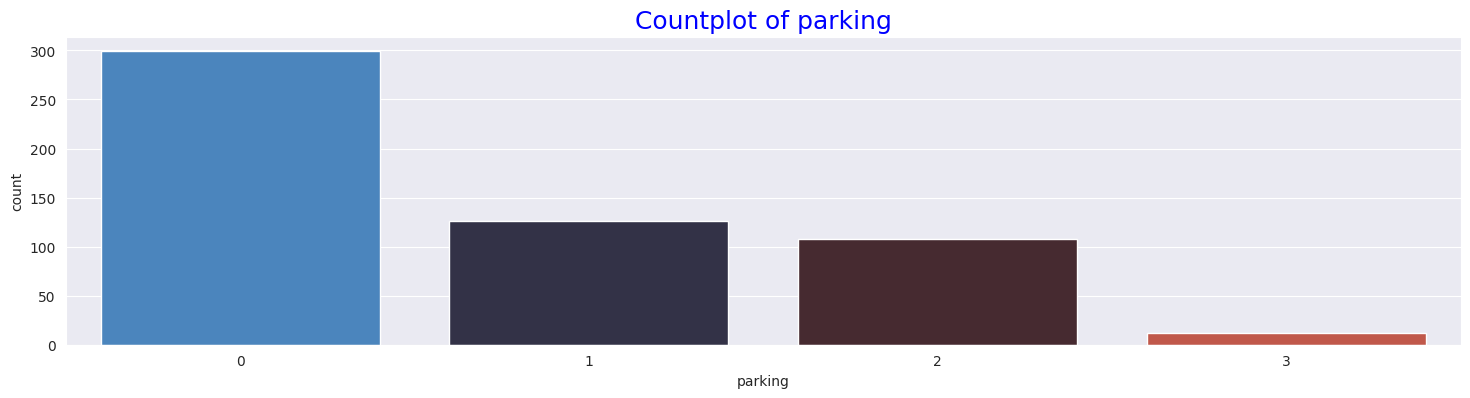

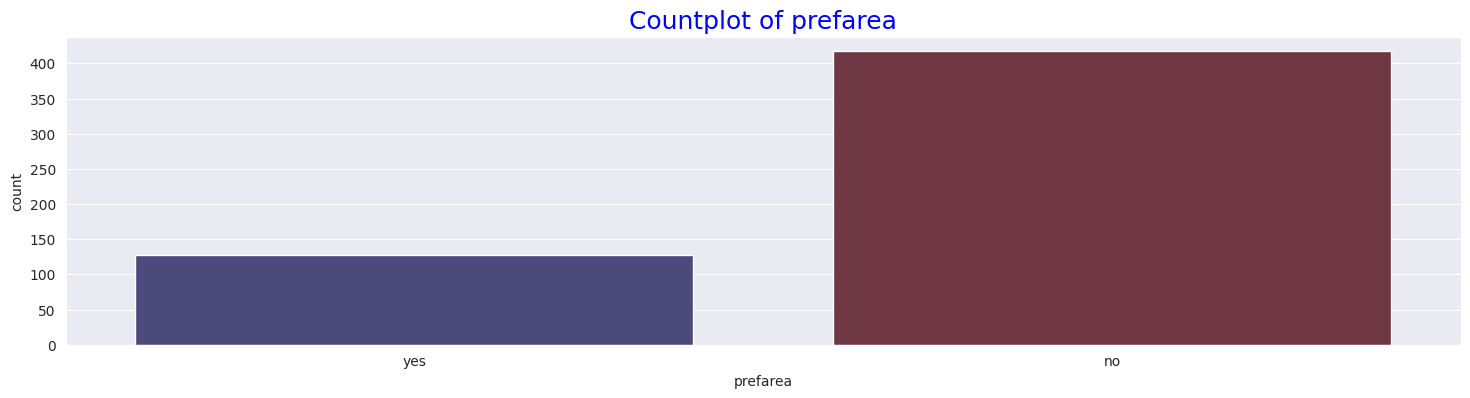

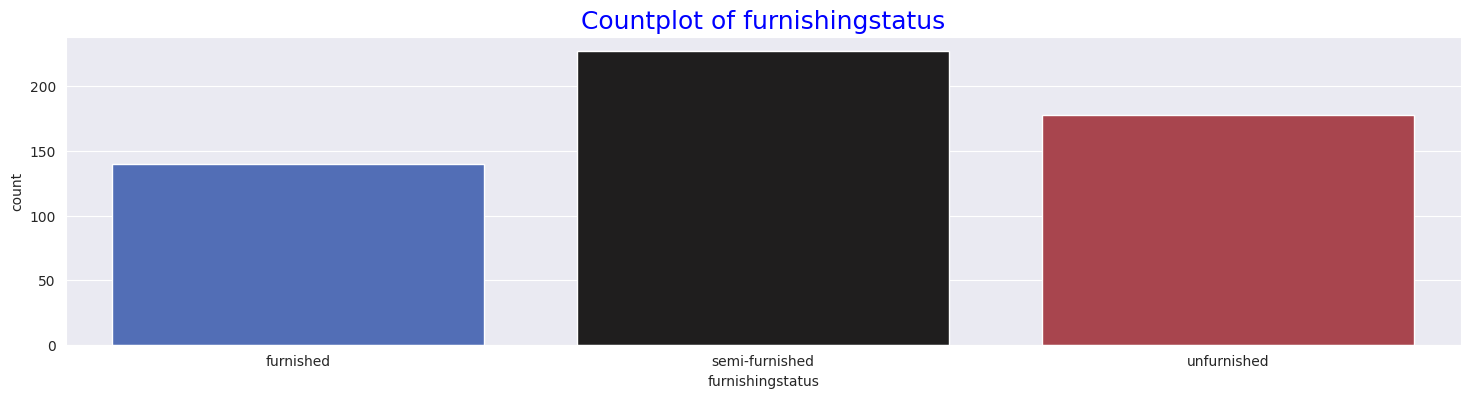

In [12]:
for i in cat_col:
  plt.figure(figsize=(18, 4))
  sns.countplot(data=df, x=i, palette='icefire')
  plt.title(f'Countplot of {i}', fontdict={'size': 18, 'color':'blue'})
  plt.show()

## Feature Engineering

In [13]:
# removing outliers
df.drop(index=df[df.price>10000000].index, inplace=True)

In [14]:
# normalization
X = df.drop(columns='price')
y = df['price'] / 10000000

feature_num = X.select_dtypes(exclude='object').columns
feature_cat = X.select_dtypes(include='object').columns

In [15]:
# preprocessing
preprocessor = make_column_transformer((MinMaxScaler(), feature_num),
                                       (OneHotEncoder(handle_unknown='ignore'),feature_cat))

## Train Test Split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [17]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [18]:
X_train.shape

(483, 20)

## Deeplearning model

In [19]:
# transfer to tensor
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)

y_train = torch.tensor(y_train.values, dtype=torch.float32)
y_test = torch.tensor(y_test.values, dtype=torch.float32)

In [20]:
X_train.shape

torch.Size([483, 20])

In [21]:
y_train.shape

torch.Size([483])

In [22]:
# create DataLset
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

# create DataLoader
train_dataloader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=16, shuffle=True)

In [67]:
# define the model
class ForwardNN(nn.Module):
  def __init__(self, input_size, hidden_size, output_size):
    super(ForwardNN, self).__init__()
    self.fc1 = nn.Linear(input_size, hidden_size)
    self.dropout1 = nn.Dropout(p=0.5)
    self.relu1 = nn.ReLU()
    self.fc2 = nn.Linear(hidden_size, hidden_size)
    self.dropout2 = nn.Dropout(p=0.5)
    self.relu2 = nn.ReLU()
    self.fc3 = nn.Linear(hidden_size, output_size)


  def forward(self, x):
    out = self.fc1(x)
    out = self.dropout1(out)
    out = self.relu1(out)
    out = self.fc2(out)
    out = self.dropout2(out)
    out = self.relu2(out)
    out = self.fc3(out)
    return out

# use the model
input_size = X_train.shape[1]
hidden_size = 32
output_size = 1
model = ForwardNN(input_size, hidden_size, output_size)

# optimizer and loss for model
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001, weight_decay=1e-6)


In [36]:
# plot the model structure
! pip install torchviz
from torchviz import make_dot

In [37]:
dummy_input = torch.randn(1, input_size)
output = model(dummy_input)

# make the png
make_dot(output, params=dict(model.named_parameters())).render("model_architecture", format='png')

'model_architecture.png'

In [68]:
# make summary
from torchsummary import summary

# Print the summary of the model
summary(model, input_size=(1, input_size))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                [-1, 1, 32]             672
           Dropout-2                [-1, 1, 32]               0
              ReLU-3                [-1, 1, 32]               0
            Linear-4                [-1, 1, 32]           1,056
           Dropout-5                [-1, 1, 32]               0
              ReLU-6                [-1, 1, 32]               0
            Linear-7                 [-1, 1, 1]              33
Total params: 1,761
Trainable params: 1,761
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.01
Estimated Total Size (MB): 0.01
----------------------------------------------------------------


In [69]:
# Training Loop

# Initialize lists to track losses
train_losses = []
test_losses = []

epochs = 50

for epoch in range(epochs):
  model.train()
  running_loss = 0.0

  for i, (inputs, labels) in enumerate(train_dataloader):
    optimizer.zero_grad()

    outputs = model(inputs)
    loss = criterion(outputs, labels)

    loss.backward()
    optimizer.step()

    running_loss += loss.item()

  train_losses.append(running_loss / len(train_dataloader))

  # for evaluation
  model.eval()
  running_test_loss = 0.0

  with torch.no_grad():
    for inputs, labels in test_dataloader:
      outputs = model(inputs)
      loss = criterion(outputs, labels)
      running_test_loss += loss.item()

    test_losses.append(running_test_loss / len(test_dataloader))

    print(f'Epoch [{epoch+1}/{epochs}], Training_loss: {train_losses[-1]}, Test_loss: {test_losses[-1]}')



Epoch [1/50], Training_loss: 0.21549171954393387, Test_loss: 0.19760368764400482
Epoch [2/50], Training_loss: 0.19720308747022383, Test_loss: 0.19265368208289146
Epoch [3/50], Training_loss: 0.1755129752620574, Test_loss: 0.1668691411614418
Epoch [4/50], Training_loss: 0.1548127099390953, Test_loss: 0.15016263537108898
Epoch [5/50], Training_loss: 0.1333886226338725, Test_loss: 0.13727628998458385
Epoch [6/50], Training_loss: 0.12258248583924386, Test_loss: 0.1153973639011383
Epoch [7/50], Training_loss: 0.1072569967758271, Test_loss: 0.0961888674646616
Epoch [8/50], Training_loss: 0.1006024971364006, Test_loss: 0.08296155370771885
Epoch [9/50], Training_loss: 0.08873386777216388, Test_loss: 0.0760847395285964
Epoch [10/50], Training_loss: 0.07875152166572309, Test_loss: 0.06902908720076084
Epoch [11/50], Training_loss: 0.07337884857289252, Test_loss: 0.07246783189475536
Epoch [12/50], Training_loss: 0.07314455449100464, Test_loss: 0.05647439416497946
Epoch [13/50], Training_loss: 0.06

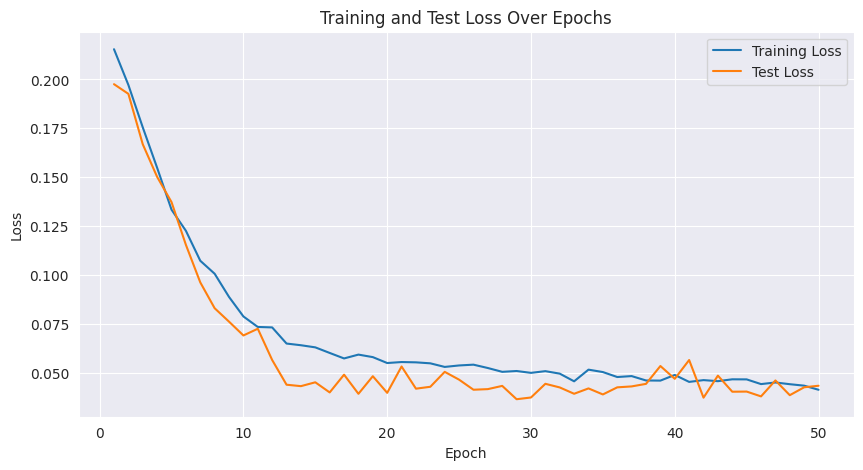

In [70]:
# Plot training and test loss over epochs
plt.figure(figsize=(10, 5))
plt.plot(range(1, epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, epochs + 1), test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss Over Epochs')
plt.legend()
plt.show()

In [72]:
# Save both model and optimizer states
torch.save({
    'model_state_dict': model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
}, 'checkpoint.pth')

## Make prediction and plot

In [73]:
# Set the model to evaluation mode (important)
model.eval()

# Make predictions on the test data
with torch.no_grad():  # No need to track gradients for inference
    predictions = model(X_test)

# Convert predictions to numpy array for easy plotting
predicted_values = predictions.numpy()

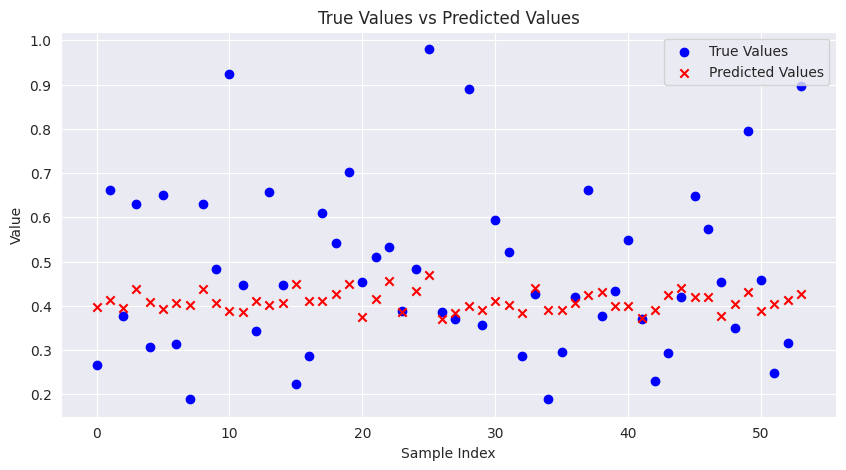

In [74]:
y_test_numpy = y_test.values if isinstance(y_test, pd.Series) else y_test

# Plotting predicted vs actual values
plt.figure(figsize=(10, 5))
plt.scatter(range(len(y_test_numpy)), y_test_numpy, label="True Values", color="blue")
plt.scatter(range(len(predicted_values)), predicted_values, label="Predicted Values", color="red", marker='x')
plt.title('True Values vs Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()
plt.show()

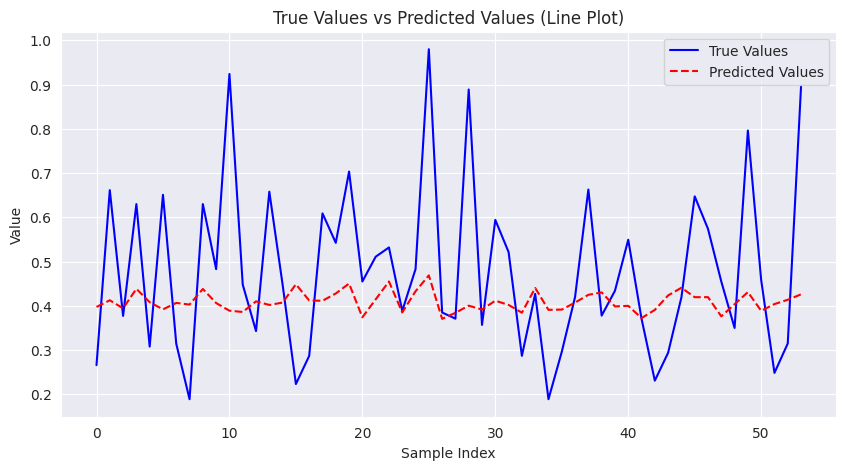

In [75]:
# Line plot to compare predictions and true values
plt.figure(figsize=(10, 5))
plt.plot(y_test_numpy, label="True Values", color="blue")
plt.plot(predicted_values, label="Predicted Values", color="red", linestyle='dashed')
plt.title('True Values vs Predicted Values (Line Plot)')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()
plt.show()